# Homework 4: Text Classification

In this homework, you will work with a dataset composed of the posts from Tweetter. The goal is to identify if there is an emergency information in the tweet or not. This is a binary classification task.

\

We will use a dataset from Kaggle contest: https://www.kaggle.com/competitions/nlp-getting-started/data Download train.csv file (test.csv files in competitions typically do not have labels available, only organizers know them and use to validate the submissions). The code below will split the first file into train and validation sets.

*In case you don't want to register on Kaggle or use your gmail account, sent me e-mail and I'll send you the dataset*

In [183]:
import pandas as pd

In [184]:
data = pd.read_csv('train.csv')

In [185]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Q1 (1pt)

Print information about missing values. Fill in missing values with an empty string [Example in SGD notebook](https://github.com/anton-selitskiy/RIT_ML/blob/main/2025_spring/Week04_SGD/ML7.ipynb) in ceaning of the Automobiles dataset.

In [186]:
data.isnull().sum()

,0
id,0
keyword,61
location,2533
text,0
target,0


In [187]:
data.loc[:, data.dtypes == "object"] = data.loc[:, data.dtypes == "object"].fillna("")

In [188]:
data.isnull().sum()

,0
id,0
keyword,0
location,0
text,0
target,0


Now we will split our data into Test, Validation, and Test sets. You don't want to use Test set untill Q10.

In [189]:
from sklearn.model_selection import train_test_split

train, validation = train_test_split(data, test_size=0.3, random_state=42)

In [190]:
validation, test = train_test_split(validation, test_size=0.4, random_state=42)

## Q2 (2pt)

1. What is the distribution of the classes in the Training set? (Count the fractions of classes, to understand if they are balanced or not.)

2. Plot the bar-plot for 10 mostly frequent values in the column "keyword".

Comment on the information you've seen.

In [191]:
class_distribution = train['target'].value_counts(normalize=True)

In [192]:
class_distribution

,proportion
target,
0,0.567461
1,0.432539


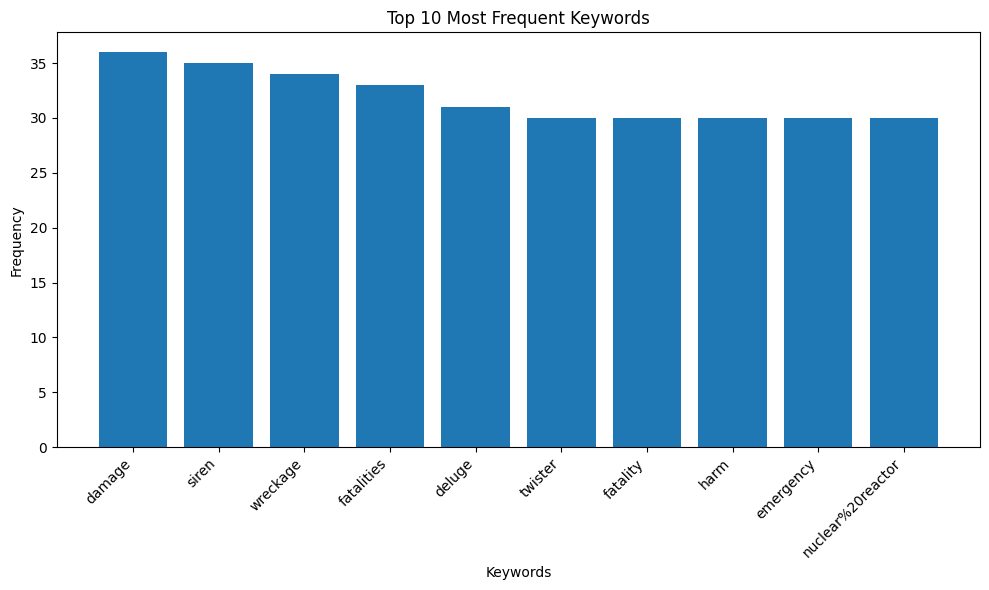

In [193]:
import matplotlib.pyplot as plt

keyword_counts = train['keyword'][train['keyword'] != ""].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
plt.bar(keyword_counts.index, keyword_counts.values)
plt.xlabel("Keywords")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent Keywords")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

I would say that my dataset is pretty balanced because the numbers are close to a 50/50 split. This means my model should be able to learn effectively from both classes and generalize well to new data.

As far as the plot goes, while most keywords seem relevant to emergency situations, further analysis is needed to understand the full vocabulary used in such tweets. The spread is pretty equal amongst the keywords though.

Here is my plot if i'm not ignoring " ". I wasn't sure what was needed.

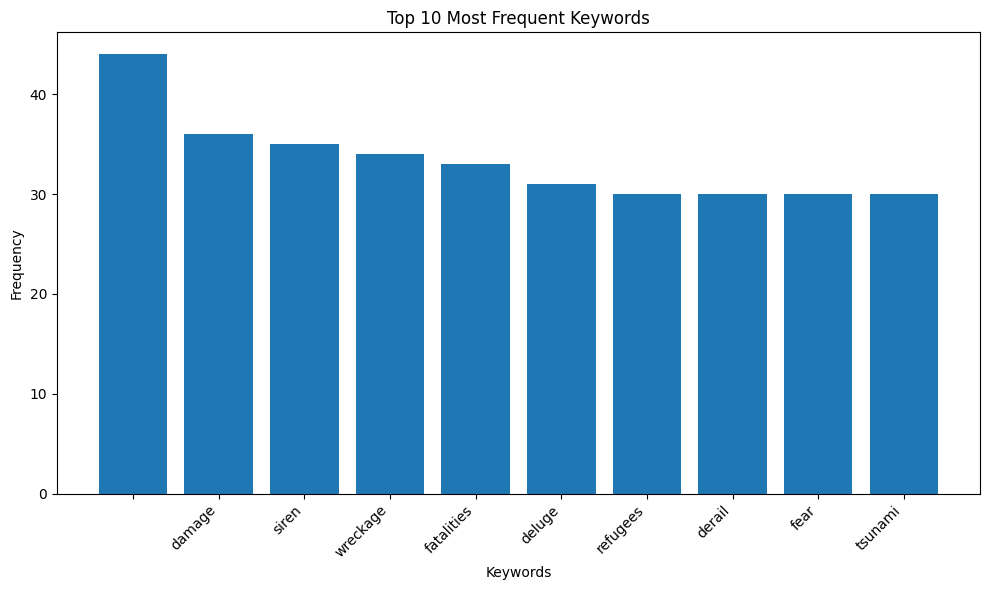

In [195]:
import matplotlib.pyplot as plt

keyword_counts = train['keyword'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
plt.bar(keyword_counts.index, keyword_counts.values)
plt.xlabel("Keywords")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent Keywords")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Q3 (1pt)

Join text columns in a new column and delete the column with id.

In [196]:

train['Concatenated'] = train['keyword'].fillna('') + " " + train['location'].fillna('') + " " + train['text']

train = train.drop(['id'], axis=1)

train = train[['target', 'Concatenated']]

train.set_index('target', inplace=True)

train = train.reset_index()

train

,target,Concatenated
0,0,bridge%20collapse Ashes 2015: AustraliaÛªs c...
1,1,"hail Carol Stream, Illinois GREAT MICHIGAN TEC..."
2,1,police Houston CNN: Tennessee movie theater s...
3,1,rioting Still rioting in a couple of hours le...
4,0,wounds Lake Highlands Crack in the path where ...
...,...,...
5324,0,obliteration Merica! @Eganator2000 There aren'...
5325,0,panic just had a panic attack bc I don't have...
5326,0,blood Omron HEM-712C Automatic Blood Pressure...
5327,1,Officials say a quarantine is in place at an...


## Q4 (1pt)

Work with train set.

1. Transform the data using CountVectorizer.
2. What is the shape of the resulted matrix?


In [197]:
from sklearn.feature_extraction.text import CountVectorizer

In [198]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(train['Concatenated'])
X_train_vec.shape

(5329, 18455)

## Q5 (2pt)

The matrix in the previous question has many columns. Let's take a look at the dictionary of tokens, method *.vocabulary_* of CountVectorizer object.

1. Find all the words in this dictionary that contain digits. How many such words were found?

2. Find all the words that contain punctuation characters. How many such words were found?

In [199]:
import re

In [200]:
digit_words = [word for word, index in vectorizer.vocabulary_.items() if re.search(r'\d', word)]
print(f"Number of words containing digits: {len(digit_words)}")

Number of words containing digits: 3812


In [201]:
punctuation_words = [word for word, index in vectorizer.vocabulary_.items() if re.search(r'[^\w\s]', word)]
print(f"Number of words containing punctuation characters: {len(punctuation_words)}")

Number of words containing punctuation characters: 0


## Q6 (1pt)

During the lecture, we learned that there is a special text tokenizer in NLTK called *TweetTokenizer.* Let's try to apply *CountVectorizer* with this tokenizer. Answer all the questions from the previous section using TweetTokenizer and compare the results.

In [202]:
from nltk.tokenize import TweetTokenizer

In [203]:
tweet_tokenizer = TweetTokenizer()
vectorizer_tweet = CountVectorizer(tokenizer=tweet_tokenizer.tokenize)
X_train_vec_tweet = vectorizer_tweet.fit_transform(train['Concatenated'])
X_train_vec_tweet.shape

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(5329, 19670)

In [204]:
digit_words_tweet = [word for word, index in vectorizer_tweet.vocabulary_.items() if re.search(r'\d', word)]
print(f"Number of words containing digits with TweetTokenizer: {len(digit_words_tweet)}")

punctuation_words_tweet = [word for word, index in vectorizer_tweet.vocabulary_.items() if re.search(r'[^\w\s]', word)]
print(f"Number of words containing punctuation characters with TweetTokenizer: {len(punctuation_words_tweet)}")

Number of words containing digits with TweetTokenizer: 3939
Number of words containing punctuation characters with TweetTokenizer: 7312


## Q7 (4pt)

In scikit-learn, we can evaluate the process of counting matrices using CountVectorizer. CountVectorizer, like other inheritors of the _VectorizerMixin, has arguments tokenizer and preprocessor. The preprocessor is applied at the very beginning to each line of your dataset, while the tokenizer takes a string and returns tokens.

Let's write a custom tokenizer that will do everything we need:

1. Convert all letters to lowercase.
2. Split the text into tokens using *TweetTokenizer* from the *nltk* package.
3. Remove all tokens that contain non-Latin characters, except for emojies (we'll consider tokens containing only punctuation and at least one parenthesis as emoticons) and hashtags that contain only Latin letters after the initial #.
4. Remove all tokens listed in nltk.corpus.stopwords.words('english').
5. Perform stemming using *SnowballStemmer.*

Demonstrate the operation of your function on the first text in the training dataset. You can access it by *.iloc[0]*

Usefull site on regular expressions: https://regex101.com/

In [205]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [206]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [207]:
stemmer = SnowballStemmer('english')

In [208]:
def custom_tokenizer(text):
    text = text.lower()

    tokens = TweetTokenizer().tokenize(text)

    filtered_tokens = []
    for token in tokens:
        if re.fullmatch(r'^[a-z]+$|[\U0001F600-\U0001F64F]|#[a-zA-Z]+$', token):
            filtered_tokens.append(token)

    filtered_tokens = [token for token in filtered_tokens if token not in stopwords.words('english')]

    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

    return stemmed_tokens

In [209]:
custom_tokenizer(train['Concatenated'].iloc[0])

['bridg',
 'ash',
 'australia',
 'collaps',
 'trent',
 'bridg',
 'among',
 'worst',
 'histori',
 'england',
 'bundl',
 'australia']

## Q8 (2pt)

1. Apply *CountVectorizer* with your tokenizer to the Train and Validation sets.
2. Train *LogisticRegression* on the features obtained.
3. Calculate f1-score on the validation set.

In [210]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [211]:
vectorizer_custom = CountVectorizer(tokenizer=custom_tokenizer)
X_train_custom = vectorizer_custom.fit_transform(train['Concatenated'])
validation["Concatenated"] = validation['keyword'].fillna('') + " " + validation['location'].fillna('') + " " + validation['text']
X_val_custom = vectorizer_custom.transform(validation['Concatenated'])

In [212]:
logreg = LogisticRegression()
logreg.fit(X_train_custom, train['target'])

LogisticRegression()

In [213]:
y_pred = logreg.predict(X_val_custom)

In [214]:
f1 = f1_score(validation['target'], y_pred)
print(f"F1-score on validation set: {f1}")

F1-score on validation set: 0.7445652173913043


## Q9 (2pt)

1. Repeat Q8, but with a TF-IDF vectorizer. How did the quality change?

2. We can further reduce the size of our matrix by discarding *df* values close to one. Most likely, such words do not carry much information about the category since they occur quite frequently. Limit the maximum df in the parameters of TfIdfVectorizer, set the upper limit to 0.9. How did the matrix size change, and how did the quality change?

3. We can also reduce the size of the matrix by removing words with very small *df* values. Were you able to improve the quality by doing this?

For example, min_df = 5 means ignore words that appear less than in 5 documents.

In [215]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [216]:
tfidf_vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)
X_train_tfidf = tfidf_vectorizer.fit_transform(train['Concatenated'])
X_val_tfidf = tfidf_vectorizer.transform(validation['Concatenated'])

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [217]:
logreg_tfidf = LogisticRegression()
logreg_tfidf.fit(X_train_tfidf, train['target'])
y_pred_tfidf = logreg_tfidf.predict(X_val_tfidf)
f1_tfidf = f1_score(validation['target'], y_pred_tfidf)

In [218]:
print(f"F1-score on validation set with TF-IDF: {f1_tfidf}")
print(f"Previous F1 score (CountVectorizer): {f1}")

F1-score on validation set with TF-IDF: 0.739906103286385
Previous F1 score (CountVectorizer): 0.7445652173913043


In [219]:
tfidf_vectorizer_max_df = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.9)
X_train_tfidf_max_df = tfidf_vectorizer_max_df.fit_transform(train['Concatenated'])
X_val_tfidf_max_df = tfidf_vectorizer_max_df.transform(validation['Concatenated'])

print(f"Shape of TF-IDF matrix with max_df=0.9: {X_train_tfidf_max_df.shape}")
print(f"Shape of previous TF-IDF matrix: {X_train_tfidf.shape}")

logreg_tfidf_max_df = LogisticRegression()
logreg_tfidf_max_df.fit(X_train_tfidf_max_df, train['target'])
y_pred_tfidf_max_df = logreg_tfidf_max_df.predict(X_val_tfidf_max_df)
f1_tfidf_max_df = f1_score(validation['target'], y_pred_tfidf_max_df)

print(f"F1-score on validation set with TF-IDF and max_df=0.9: {f1_tfidf_max_df}")
print(f"Previous F1 score (TF-IDF): {f1_tfidf}")

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Shape of TF-IDF matrix with max_df=0.9: (5329, 10470)
Shape of previous TF-IDF matrix: (5329, 10470)
F1-score on validation set with TF-IDF and max_df=0.9: 0.739906103286385
Previous F1 score (TF-IDF): 0.739906103286385


In [220]:
tfidf_vectorizer_min_df = TfidfVectorizer(tokenizer=custom_tokenizer, min_df=5)
X_train_tfidf_min_df = tfidf_vectorizer_min_df.fit_transform(train['Concatenated'])
X_val_tfidf_min_df = tfidf_vectorizer_min_df.transform(validation['Concatenated'])

print(f"Shape of TF-IDF matrix with min_df=5: {X_train_tfidf_min_df.shape}")
print(f"Shape of previous TF-IDF matrix: {X_train_tfidf.shape}")

logreg_tfidf_min_df = LogisticRegression()
logreg_tfidf_min_df.fit(X_train_tfidf_min_df, train['target'])
y_pred_tfidf_min_df = logreg_tfidf_min_df.predict(X_val_tfidf_min_df)
f1_tfidf_min_df = f1_score(validation['target'], y_pred_tfidf_min_df)

print(f"F1-score on validation set with TF-IDF and min_df=5: {f1_tfidf_min_df}")
print(f"Previous F1 score (TF-IDF): {f1_tfidf}")


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Shape of TF-IDF matrix with min_df=5: (5329, 2017)
Shape of previous TF-IDF matrix: (5329, 10470)
F1-score on validation set with TF-IDF and min_df=5: 0.7382053654024052
Previous F1 score (TF-IDF): 0.739906103286385


Part 1: TF-IDF vs. CountVectorizer

Using the TF-IDF vectorizer instead of CountVectorizer with the custom tokenizer resulted in a slight decrease in model quality, with the F1-score dropping from 0.7446 to 0.7399. This suggests that in this scenario, the TF-IDF weighting was not as beneficial as simply counting word occurrences, so TF-IDF decreased the quality.

Part 2: Limiting max_df

Setting max_df to 0.9 did not change the shape of the TF-IDF matrix, as it remained (5329, 10470) in both cases, indicating that no features were removed. The F1-score also did not change, remaining at 0.7399, so limiting max_df did not have an effect on the quality of the model.

Part 3: Limiting min_df

Setting min_df to 5 drastically reduced the matrix size from (5329, 10470) to (5329, 2017), which means that 8453 features were removed. While the matrix size decreased significantly, the F1-score decreased slightly from 0.7399 to 0.7382, meaning that the model quality also decreased by a small amount by removing the features with low df values.

## Q10 (2pt)

Evaluate the best model. The minimal value of f1-score on the Test data should be at least 0.75.

In [221]:
tfidf_vectorizers = {
    "TF-IDF": TfidfVectorizer(tokenizer=custom_tokenizer),
    "TF-IDF with MAX-DF": TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.95),
    "TF-IDF with MAX-DF and MIN-DF": TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.95, min_df=5),
    "TF-IDF with MAX-DF and MIN-DF (0.01)": TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.95, min_df=0.01)
}

models = {}
scores = {}

for name, vectorizer in tfidf_vectorizers.items():
    X_train_tfidf = vectorizer.fit_transform(train['Concatenated'])
    model = LogisticRegression(max_iter=1000)

    f1_scores = cross_val_score(model, X_train_tfidf, train['target'], cv=5, scoring='f1')

    models[name] = (model, vectorizer)
    scores[name] = np.mean(f1_scores)

    print(f"{name} - Mean F1-Score: {scores[name]}")

best_model_name = max(scores, key=scores.get)
best_model, best_vectorizer = models[best_model_name]

print(f"\nBest model: {best_model_name} with F1-Score: {scores[best_model_name]}")


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TF-IDF - Mean F1-Score: 0.7171656962478237


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TF-IDF with MAX-DF - Mean F1-Score: 0.7171656962478237


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TF-IDF with MAX-DF and MIN-DF - Mean F1-Score: 0.7239654111171122


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TF-IDF with MAX-DF and MIN-DF (0.01) - Mean F1-Score: 0.6125745999790795

Best model: TF-IDF with MAX-DF and MIN-DF with F1-Score: 0.7239654111171122


In [222]:
test['Concatenated'] = test['keyword'] + ' ' + test['location'] + ' ' + test['text']

X_test_tfidf = best_vectorizer.transform(test['Concatenated'])

X_train_tfidf = best_vectorizer.fit_transform(train['Concatenated'])
best_model.fit(X_train_tfidf, train['target'])

y_test_pred = best_model.predict(X_test_tfidf)

f1_test = f1_score(test['target'], y_test_pred)

print(f"F1-Score on Test Set for {best_model_name}: {f1_test}")


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


F1-Score on Test Set for TF-IDF with MAX-DF and MIN-DF: 0.7486486486486487


## Q11 (2pt)
Visualize the most important features (use class notebook).

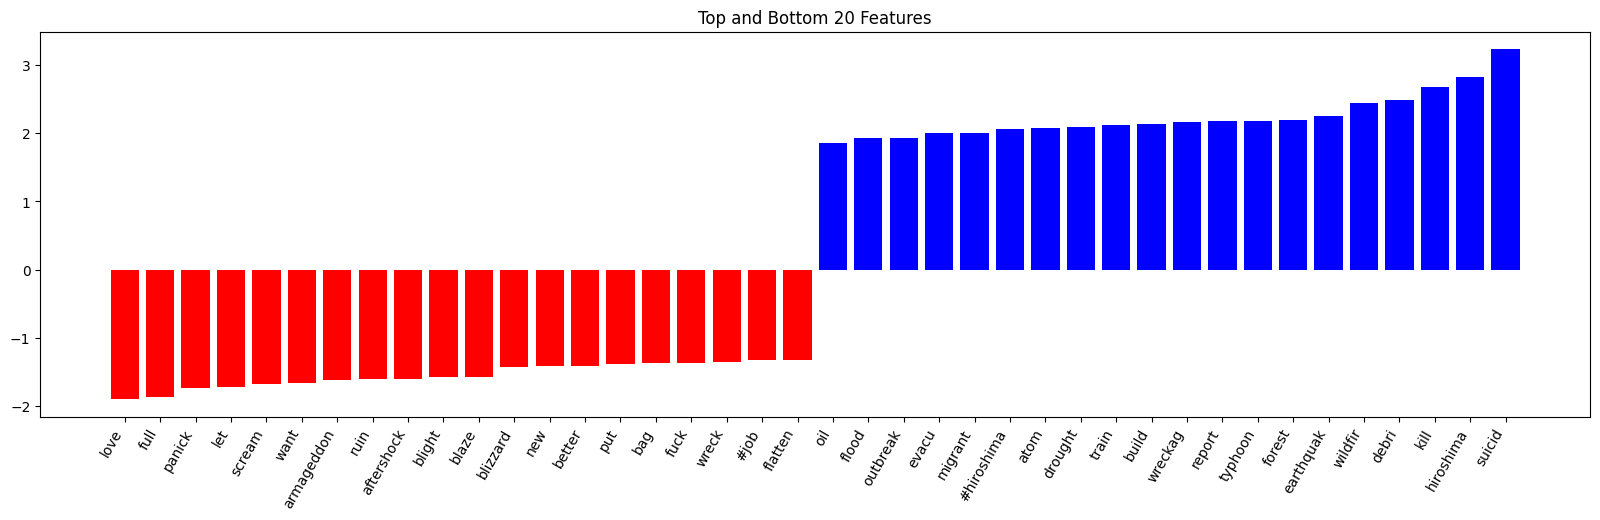

In [223]:
import numpy as np
import matplotlib.pyplot as plt

feature_names = np.array(best_vectorizer.get_feature_names_out())
coefs = best_model.coef_[0]

num_top_features = 20
top_positive_coefficients = np.argsort(coefs)[-num_top_features:]
top_negative_coefficients = np.argsort(coefs)[:num_top_features]

top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

plt.figure(figsize=(20, 5))
colors = ['red' if c < 0 else 'blue' for c in coefs[top_coefficients]]
plt.bar(np.arange(2 * num_top_features), coefs[top_coefficients], color=colors)

feature_names = feature_names[top_coefficients]
plt.xticks(np.arange(0, 2 * num_top_features), feature_names, rotation=60, ha="right")
plt.title("Top and Bottom 20 Features")
plt.show()